In [1]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

## **1. Устанавливаем необходимые инструменты и загружаем геном**
- Геном ранее был уже обрезан от лишних контиг, поэтому его загружаем с прошлой домашки
- После устанавливаем все необходимое:bedtools, samtools, circos, circos-tools

In [2]:
!conda create -n bs

Channels:
 - defaults
Platform: linux-64
Solving environment: - done

## Package Plan ##

  environment location: /usr/local/envs/bs



Proceed ([y]/n)? y

Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done
#
# To activate this environment, use
#
#     $ conda activate bs
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [3]:
!source activate bs && conda install -c conda-forge -c bioconda bedtools samtools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local/envs/bs

  added / updated specs:
    - bedtools
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    bedtools-2.31.1            |       hf5e1c6e_2         1.5 MB  bioconda
    bzip2-1.0.8                |       h4bc722e_7         247 KB  conda-forge
    c-ares-1.34.3              |       heb4867d_0         201 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    htslib-1.21                |       h5efdd21_0         3.0 MB  bioconda
    keyutils-1.6.1             |       h166bdaf_0         115 KB  conda-forge
    krb5-1.21.

In [4]:
!conda create -n circos

Channels:
 - defaults
Platform: linux-64
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local/envs/circos



Proceed ([y]/n)? y

Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done
#
# To activate this environment, use
#
#     $ conda activate circos
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [5]:
!source activate circos && conda install -c conda-forge -c bioconda circos circos-tools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local/envs/circos

  added / updated specs:
    - circos
    - circos-tools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argtable2-2.13             |    hd590300_1004         2.0 MB  conda-forge
    blast-2.16.0               |       hc155240_2       143.0 MB  bioconda
    blast-legacy-2.2.26        |       h9ee0642_4        35.5 MB  bioconda
    circos-0.69.9              |       hdfd78af_0        26.3 MB  bioconda
    circos-tools-0.23          |       hdfd78af_3          57 KB  bioconda
    clustalo-1.2.4             |       hdbdd923_8         340 KB  bioconda
    clustalw-2.1               |      h4ac6f70_10         339 KB  bioconda
    curl-8.8.0                 |       he654da7_1         163 KB  conda-forge
    entrez-d

## **2. Создаем файлы**

* scaffolds_info.txt
* gc_for_circos.txt
* kariotype.sh
* circos.conf

- файлы kariotype.sh и circos.conf, создала через nano, и заполнила, как будет представлено ниже.

In [6]:
!source activate bs && samtools faidx hall.fna

In [7]:
!cut -f1,2 hall.fna.fai > scaffolds_info.txt

In [8]:
# Info about each sequence (chroms in our case) and its length
!head scaffolds_info.txt

OZ185636.1	31692778
OZ185637.1	24286809
OZ185638.1	28101448
OZ185639.1	25922902
OZ185640.1	22203194
OZ185641.1	26635490
OZ185642.1	26679382
OZ185643.1	22649004


**kariotype.sh**



```
#!/bin/bash

input="scaffolds_info.txt"
output="karyotype.txt"

# Цвета для разных скаффолдов
colors=(green blue red purple orange cyan)

# Очищаем файл кариотипа, если он уже существует
> "$output"

# Счётчик для цвета
color_index=0

while IFS=$'\t' read -r scaffold length; do
    # Выбираем цвет для каждого скаффолда, циклически используя массив colors
    color=${colors[$color_index]}
    echo "chr - $scaffold $scaffold 0 $length $color" >> "$output"
    
    # Переходим к следующему цвету в массиве
    color_index=$(( (color_index + 1) % ${#colors[@]} ))
done < "$input"

echo "Файл кариотипа создан: $output"
```



In [9]:
!chmod +x ./karyotype.sh
!./karyotype.sh

Файл кариотипа создан: karyotype.txt


**circos.conf:**

```
debuggroup = output, summary
debuglevel = 2

# Определение кариотипа генома
karyotype = karyotype.txt

# Настройка изображения
<image>
    # Параметры изображения
    radius           = 1500p             # Размер радиуса в пикселях
    background       = white             # Цвет фона
    file             = hall.png  # Имя выходного файла
    png              = yes               # Формат вывода PNG
    svg              = no                # Отключение формата SVG
</image>

<plots>
    # График GC-содержания в виде линии
    <plot>
        type         = line              # Тип графика: линия
        file         = gc_for_circos.txt # Файл с данными для графика
        r1           = 0.8r              # Внутренний радиус графика
        r0           = 0.6r              # Внешний радиус графика
        color        = blue              # Цвет линии графика
        thickness    = 2p                # Толщина линии графика

        <axes>
            show      = yes
            thickness = 1p
            color     = grey
        </axes>

        <backgrounds>
            <background>
                color = vvlgrey
                y1    = 1.0
                y0    = 0
            </background>
        </backgrounds>
    </plot>
</plots>

# Настройка идеограммы (визуальное представление хромосом)
<ideogram>
    <spacing>
        default = 0.01r                  # Промежуток между хромосомами (радиус)
    </spacing>
    thickness       = 50p                # Толщина идеограммы в пикселях
    stroke_thickness = 2p                # Толщина границы
    stroke_color    = black              # Цвет границы
    radius          = 0.85r              # Радиус, на котором размещены идеограммы

    show_label      = yes                # Показать метки хромосом
    label_font      = default            # Шрифт для меток
    label_radius    = 1.1r               # Радиус, на котором будут метки
    label_size      = 24p                # Размер шрифта меток
    label_parallel  = yes                # Параллельная ориентация меток
</ideogram>

# Подключение дополнительных настроек (стили и общие параметры)
<<include etc/colors_fonts_patterns.conf>>
<<include etc/housekeeping.conf>>
```



In [10]:
!source activate bs && bedtools makewindows -g scaffolds_info.txt -w 20000 > hall_intervals.bed

In [11]:
!source activate bs && bedtools nuc -fi hall.fna -bed hall_intervals.bed > gc_content.txt

In [12]:
!awk '{print $1, $2, $3, $5}' gc_content.txt > gc_for_circos.txt

## 3. Строим график

In [13]:
!source activate circos && circos -conf circos.conf

debuggroup summary 0.27s welcome to circos v0.69-8 15 Jun 2019 on Perl 5.032001
debuggroup summary 0.28s current working directory /content
debuggroup summary 0.28s command /usr/local/envs/circos/bin/circos -conf circos.conf
debuggroup summary 0.28s loading configuration from file circos.conf
Use of uninitialized value in subroutine entry at /usr/local/envs/circos/bin/../lib/Circos/Configuration.pm line 781.
debuggroup summary 0.28s found conf file circos.conf
Use of uninitialized value in numeric gt (>) at /usr/local/envs/circos/bin/../lib/Circos/Configuration.pm line 869.
debuggroup summary 0.52s debug will appear for these features: output,summary
Use of uninitialized value in sprintf at /usr/local/envs/circos/bin/../lib/Circos.pm line 170.
debuggroup summary 0.52s bitmap output image /gc_content_circos.png
debuggroup summary 0.52s parsing karyotype and organizing ideograms
debuggroup summary 0.53s karyotype has 8 chromosomes of total size 208,171,015
debuggroup summary 0.53s applyi

In [14]:
!ls

circos.conf	   hall.fna	       karyotype.sh			  sample_data
gc_content.txt	   hall.fna.fai        karyotype.txt			  scaffolds_info.txt
gc_for_circos.txt  hall_intervals.bed  Miniconda3-latest-Linux-x86_64.sh


In [15]:
!find / -type f -name "gc_content_circos.png"

find: ‘/proc/69/task/69/net’: Invalid argument
find: ‘/proc/69/net’: Invalid argument
/gc_content_circos.png


In [16]:
!mv /gc_content_circos.png /content/

- в файле circos.conf, прописала путь до корневой деректории, поэтому файл немного потеряла.

окна 10000:

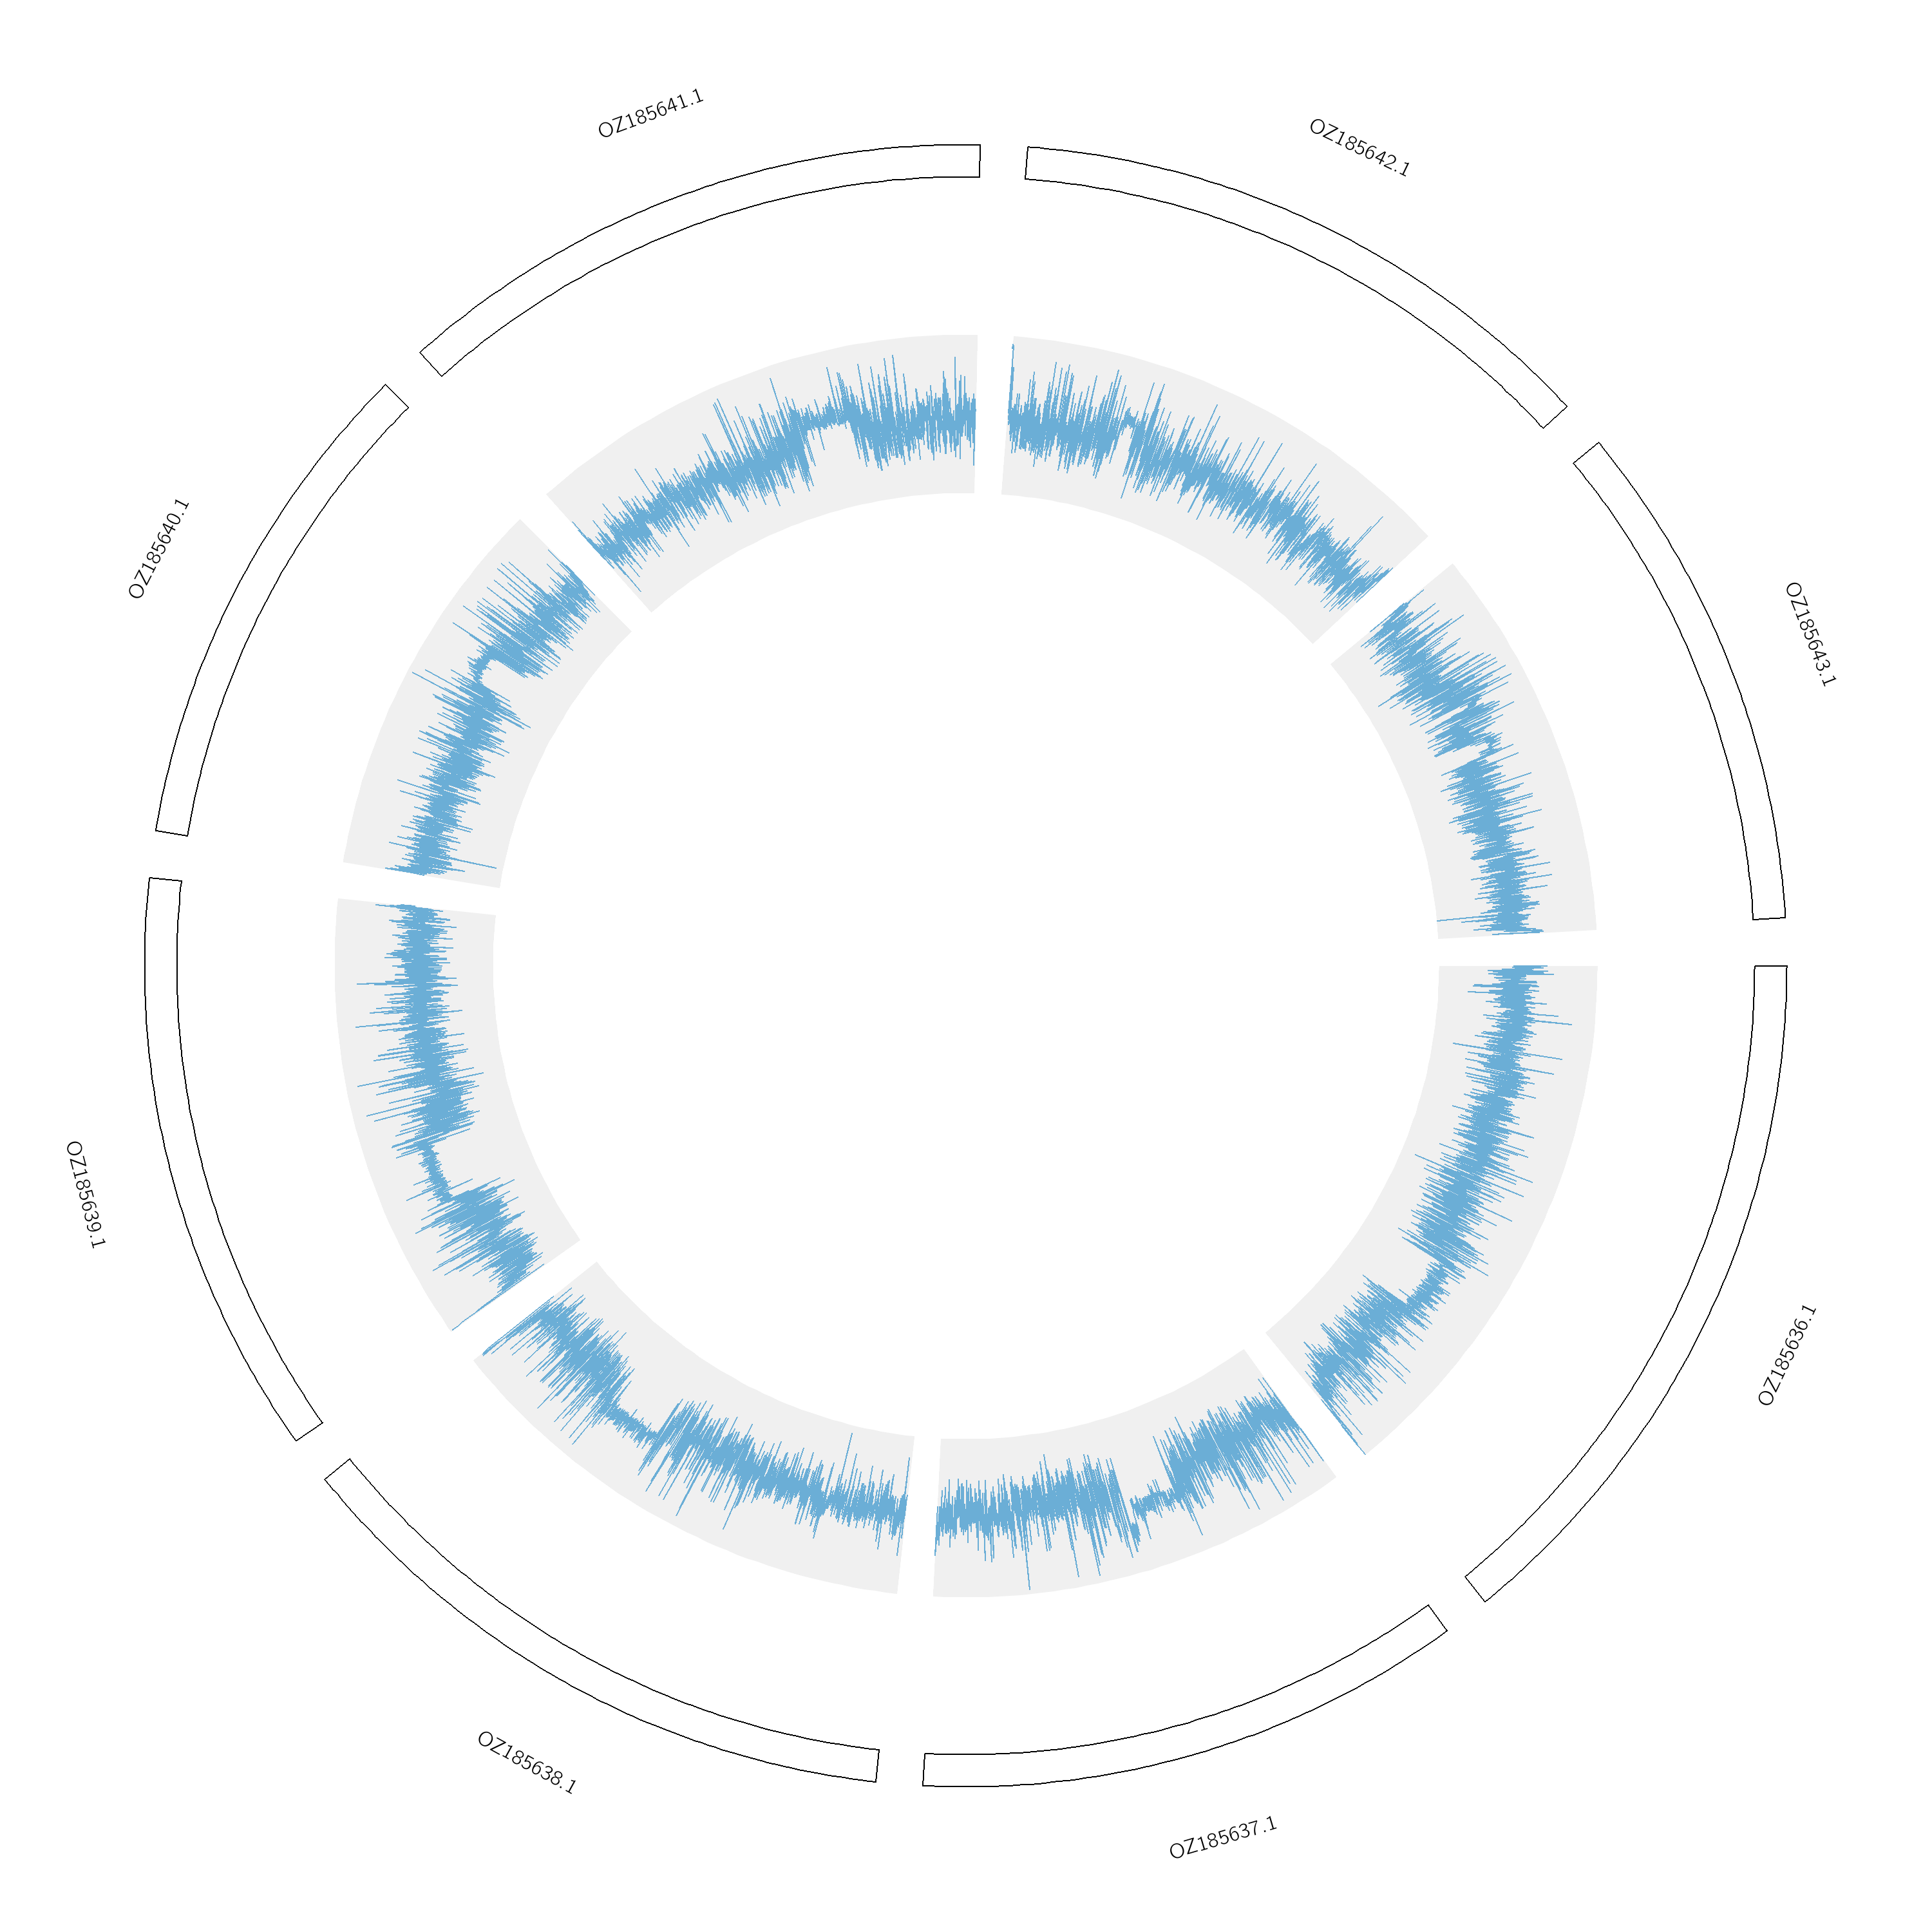

- 20000:

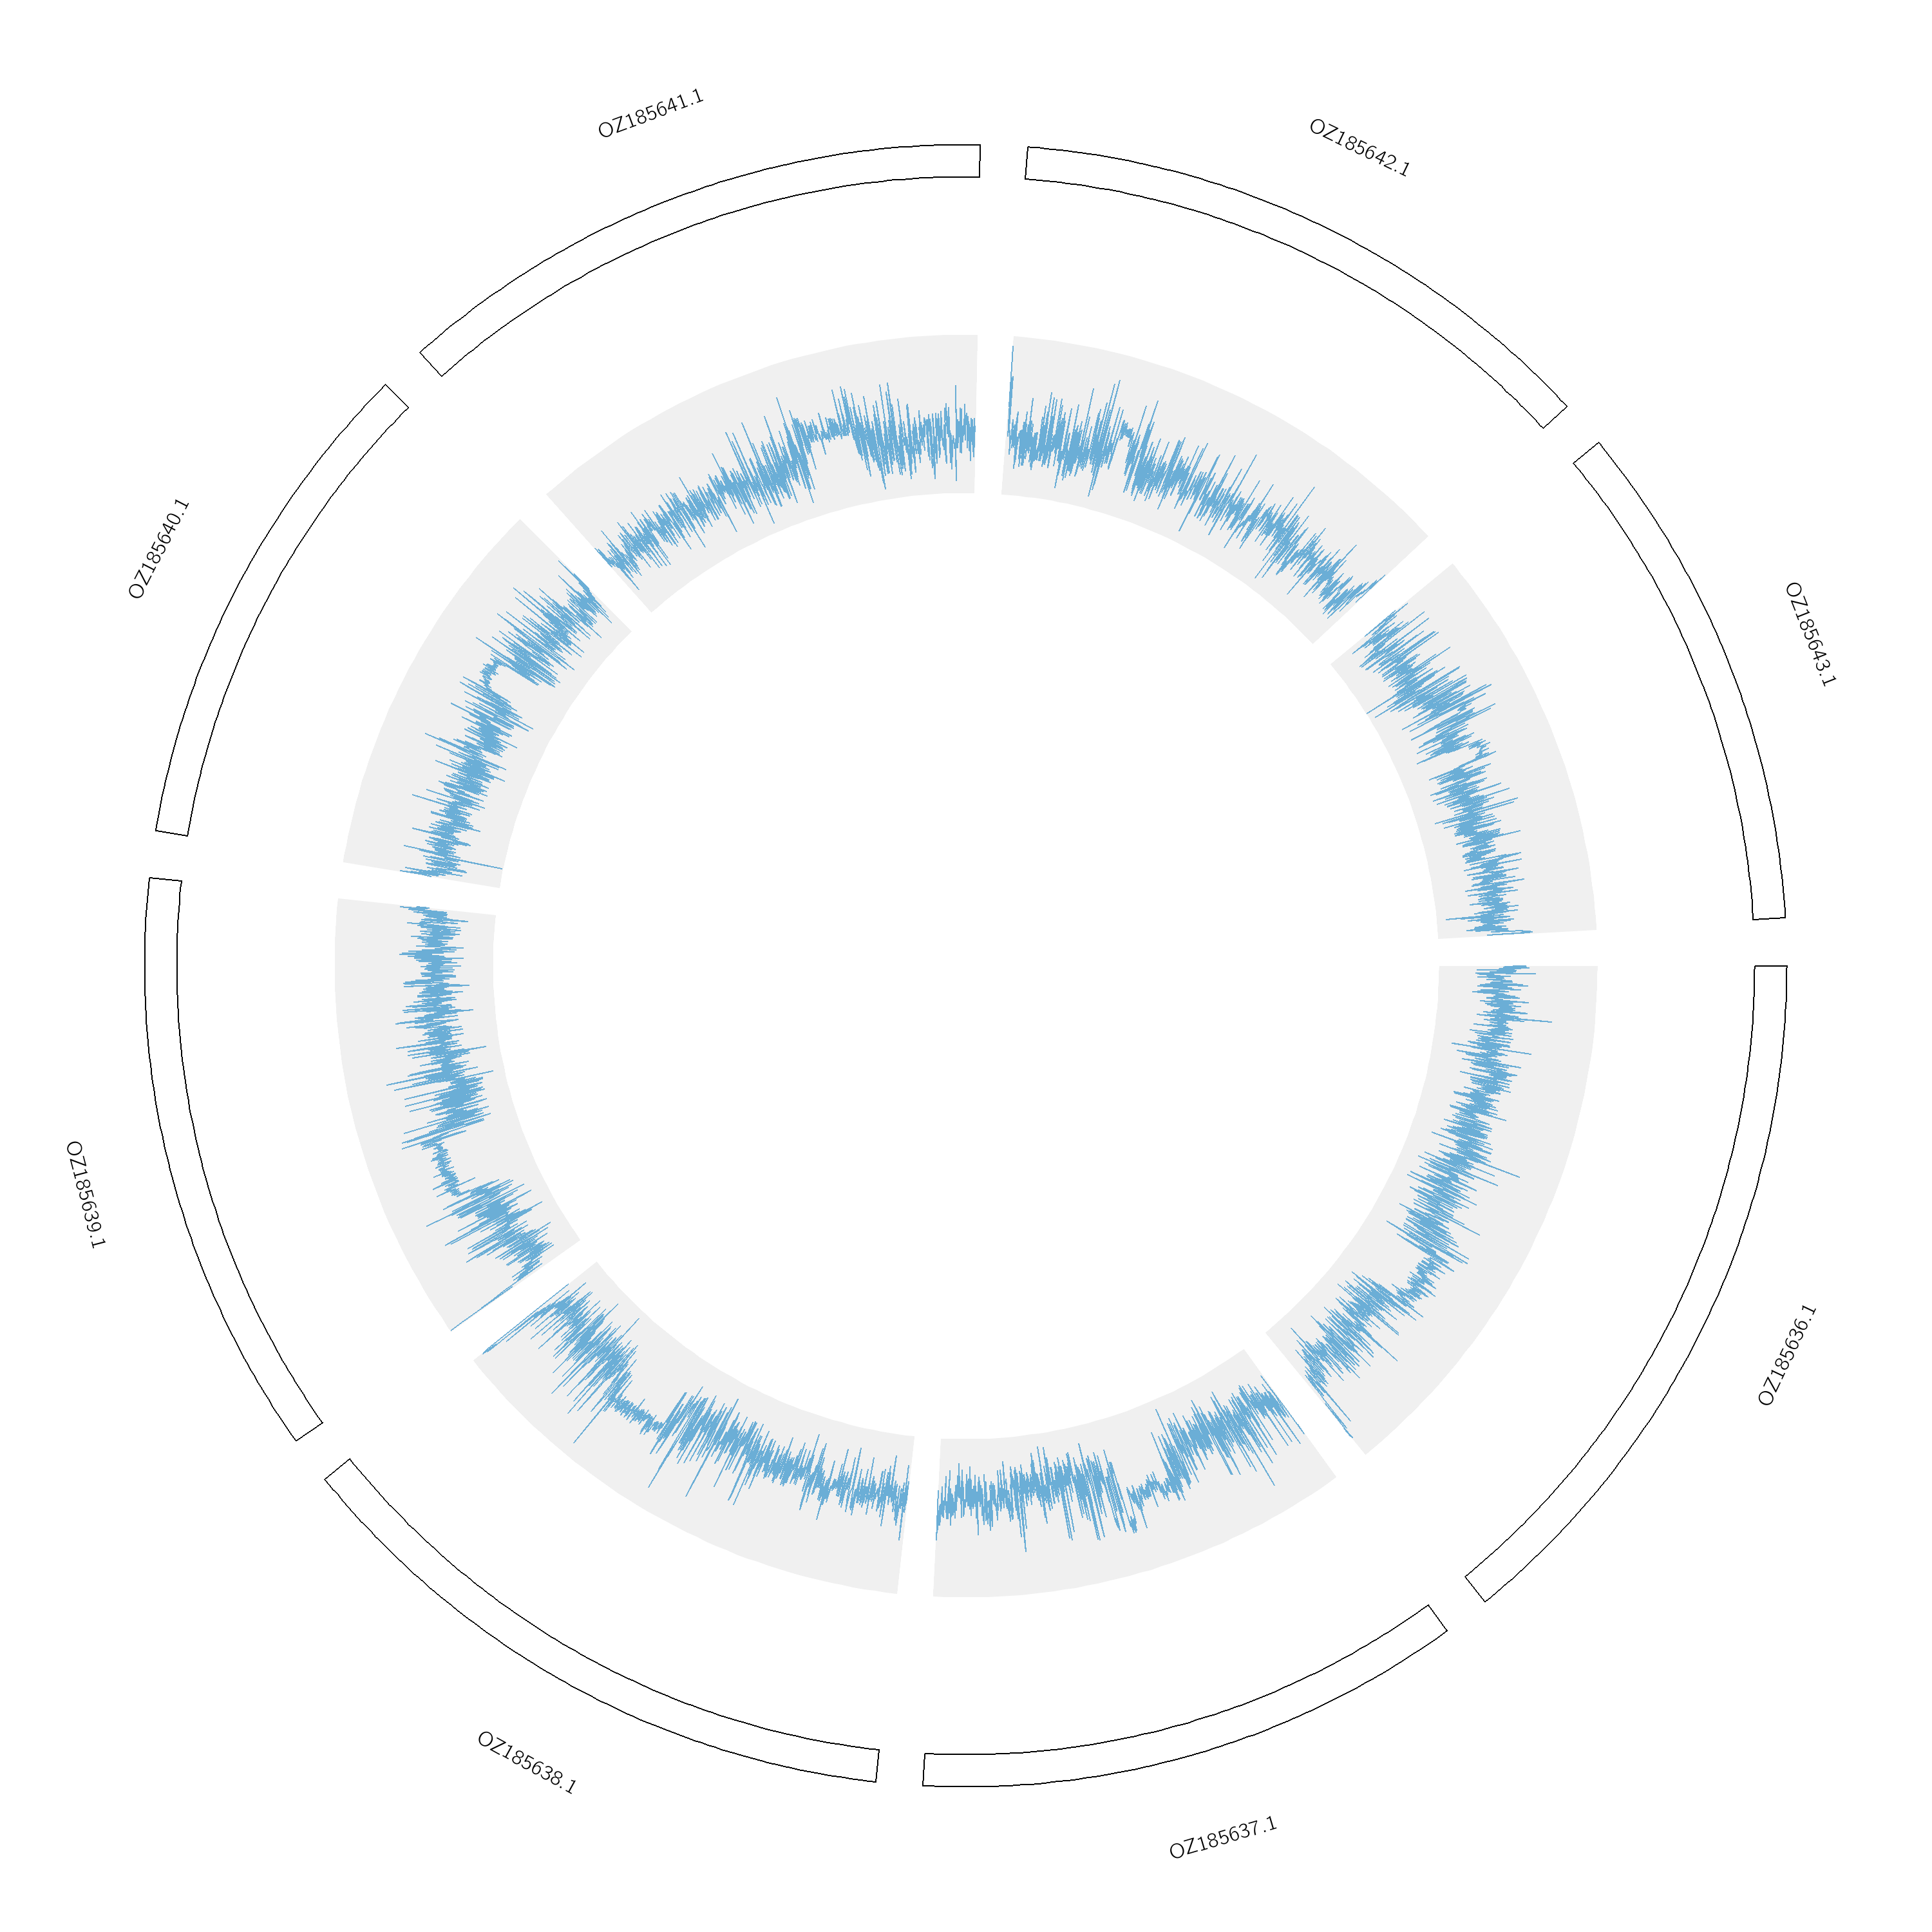